In [40]:
import torch
import torch_geometric

In [36]:
from RNARepLearn.datasets import Dataset_UTR5
dataset = Dataset_UTR5("/lustre/groups/crna01/workspace/nicolas_msc/RNARepLearn/5utr/5UTR_Optimizer/processed/concat")

from RNARepLearn.utils import train_val_test_loaders
train_loader, val_loader, test_loader = train_val_test_loaders(dataset, 0.8, 0.1, 0.1,32)

Training:	3212
Test:	401
Validation:	402


Processing...
Done!


In [61]:
from torch_geometric.utils import to_dense_batch
batch = next(iter(train_loader))

In [62]:
dense, mask = to_dense_batch(batch)

AttributeError: 'GlobalStorage' object has no attribute 'device'

In [4]:
to_dense_batch(batch.x, batch.batch)[0].shape

torch.Size([32, 50, 4])

In [5]:
from RNARepLearn.modules import RPINetEncoder

In [6]:
rpi = RPINetEncoder(4,32, 3, 9)
rpi.double()

RPINetEncoder(
  (body): Sequential(
    (0): RPINetGNNLayer()
    (1): RPINetGNNLayer()
    (2): RPINetGNNLayer()
    (3): LSTM(32, 32, bidirectional=True)
  )
)

In [7]:
batch = next(iter(train_loader))
rpi(batch)

DataBatch(x=[1600, 64], edge_index=[2, 14631], edge_weight=[14631], mrl=[32], ID=[32], library=[32], designed=[32], batch=[1600], ptr=[33])

In [1]:
import pandas as pd

In [49]:
csv = pd.read_csv("../5utr/5UTR_design/raw/GSM3130443_designed_library.csv")
csv

/tmp/ipykernel_76740/1336151956.py:1: DtypeWarning: Columns (33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("../5utr/5UTR_design/raw/GSM3130443_designed_library.csv")


,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,rl,id,info1,info2,info3,info4,library,mother,designed,match_score
0,0,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,1763,1880,2154,2959,2122,1896,2618,1899,...,4.823082,NC_000012.12:g.4911352C>T,rs886049508,chr12:4911298-4911381,snv,normal,snv,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,True,0.0
1,2,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,1108,1317,774,1201,1813,2011,3340,2454,...,6.252208,8527,ENSG00000105492,ENST00000343300,-,-,human_utrs,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,True,0.0
2,3,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,918,894,523,782,877,999,1436,1799,...,7.499574,3409,20,8.81778335571289,-,-,target_no_uaug_allow_stop,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,True,0.0
3,4,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,1439,1468,1322,1890,1347,1287,2007,2121,...,5.835379,8772,ENSG00000124570,ENST00000335686,-,-,human_utrs,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,True,0.0
4,5,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,952,876,854,1675,2170,1825,2585,1385,...,5.433105,6322,ENSG00000149932,ENST00000279396,-,-,human_utrs,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,53024,CCGAGAGCAGGAGGGCGCATCCGTGGCCGTTCACATGGTTTCAAGG...,6,5,5,15,22,17,13,6,...,4.089237,NaN,NaN,NaN,NaN,NaN,human_utrs,CCGAGAGCAGGCGGGCGCATCCGTGGCCGTTCACATGGTTTCAAGG...,False,98.0
100013,53025,CAATTTGTTGGTTTAGTCTTCTATCTGTCACCGACAGGAAAATCAT...,6,7,6,3,4,3,8,8,...,7.380217,NaN,NaN,NaN,NaN,NaN,target_no_uaug_allow_stop,AAATTTGTTGGTTTAGTCTTCTATCTGTCACCGACAGGAAAATCAT...,False,96.0
100014,53026,CCGGGATACTTCACGTTAGGGGTCGGAAAAGATGAAACACAGGAAG...,6,9,16,28,16,12,7,0,...,2.335412,NaN,NaN,NaN,NaN,NaN,egfp_controls,CCGGGCTACTTCACGTTAGGGGTCGGAAAAGATGAAACACAGGAAG...,False,98.0
100015,53027,CATTCTATTTTGGAATCTCTATGTGTTTGGTTCAAATGGCGAAAAA...,15,3,0,4,0,6,3,10,...,7.121724,NaN,NaN,NaN,NaN,NaN,step_worst_to_best_allow_uatg,TATTCTATTTTGGAATCTCTATGTGTTTGGTTCAAATGGCGAAAAA...,False,98.0


(array([  175.,  2155.,  6243.,  8941., 11629., 18377., 30606., 21022.,
          837.,    32.]),
 array([0.32637645, 1.28138824, 2.23640002, 3.1914118 , 4.14642358,
        5.10143536, 6.05644715, 7.01145893, 7.96647071, 8.92148249,
        9.87649427]),
 <BarContainer object of 10 artists>)

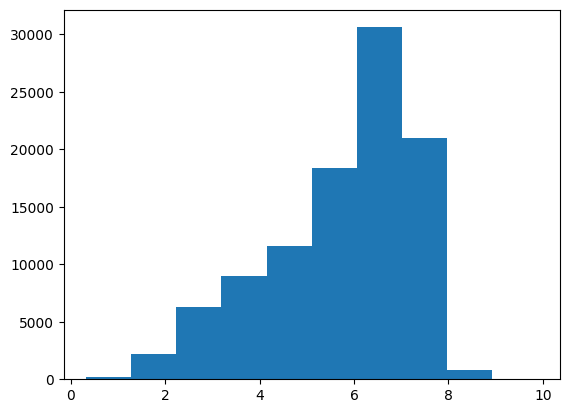

In [50]:
plt.hist(csv["rl"])

In [51]:
csv["rl"].mean()

5.743631769231548

In [52]:
import matplotlib.pyplot as plt
import numpy as np

In [53]:
exps = ["RPI_bs128", "CNN_bs128"]


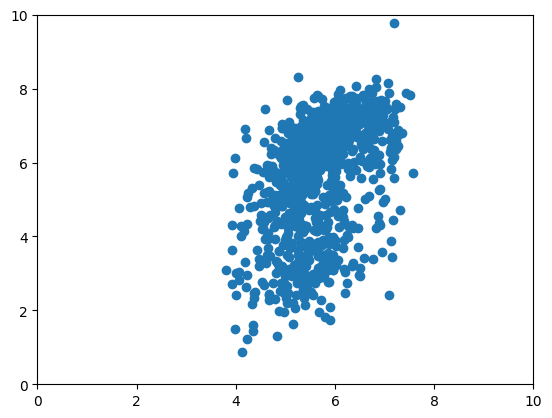

In [54]:
csv = pd.read_csv("runs/"+exps[1]+"/test/pred.csv")
plt.xlim([0, 10])
plt.ylim([0,10])
plt.scatter(csv["pred_mrl"],csv["true_mrl"])


0      5.647408
1      5.706035
2      5.736744
3      5.754282
4      5.756630
         ...   
995    5.758777
996    5.748610
997    5.727350
998    5.653042
999    5.868814
Name: pred_mrl, Length: 1000, dtype: float64

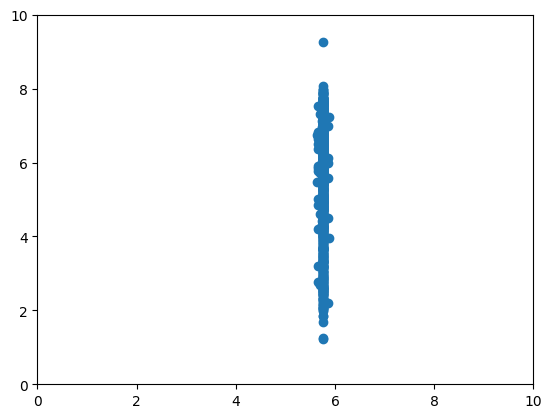

In [55]:
csv = pd.read_csv("runs/"+exps[0]+"/test/pred.csv")
plt.xlim([0, 10])
plt.ylim([0,10])
plt.scatter(csv["pred_mrl"],csv["true_mrl"])
csv["pred_mrl"]

In [43]:
exps = ["4k_CNN_20e_3el", "4k_RPI_20e_3el","4k_GCN_20e_3el"]

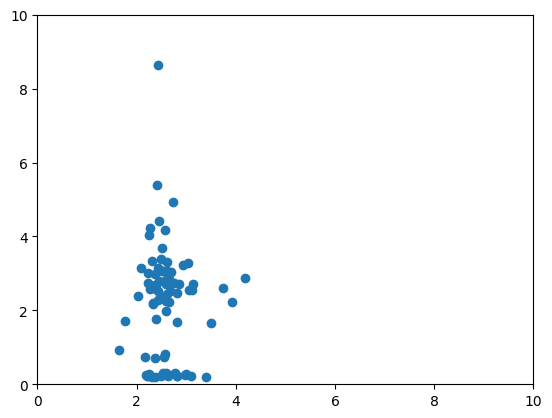

In [44]:
csv = pd.read_csv("runs/"+exps[0]+"/test/pred.csv")
plt.xlim([0, 10])
plt.ylim([0,10])
plt.scatter(csv["pred_mrl"],csv["true_mrl"])

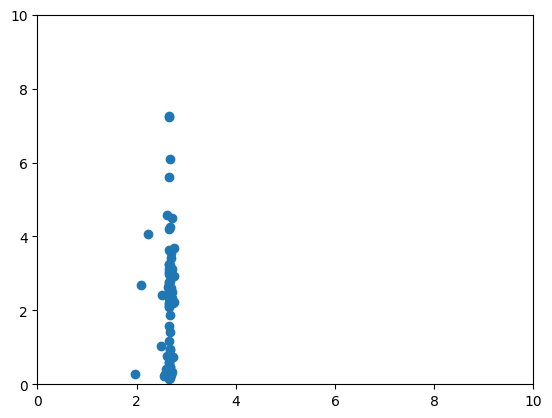

In [45]:
csv = pd.read_csv("runs/"+exps[1]+"/test/pred.csv")
plt.xlim([0, 10])
plt.ylim([0,10])
plt.scatter(csv["pred_mrl"],csv["true_mrl"])

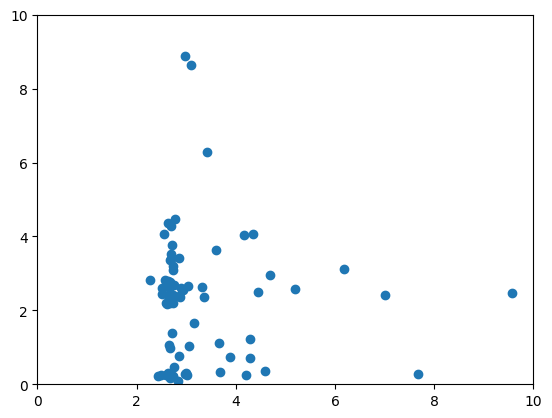

In [47]:
csv = pd.read_csv("runs/"+exps[2]+"/test/pred.csv")
plt.xlim([0, 10])
plt.ylim([0,10])
plt.scatter(csv["pred_mrl"],csv["true_mrl"])